### Evaluate one night of NEO observations (night=747) 

Created with enigma_1189 night=747 (and I did 474 by accident as well, so also evaluating this night).

Using Grav S3M - PS NEO model. Input model contains 268897 NEOs, with a distribution of H values. We have added distribution of C/S asteroids with appropriate color indexes for LSST's throughputs. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from moSlicer import MoSlicer
import moMetrics as MoMetrics
from moSummaryMetrics import ValueAtHMetric
import moPlots as moPlots
import moStackers as moStackers
import moMetricBundle as mmb
import lsst.sims.maf.plots as plots

In [2]:
orbitfile = 'neo_49353.des.db'
obsfile1 = 'neos_s3m_747_allObs.txt'
obsfile2 = 'neos_s3m_474_allObs.txt' #I ran this night also, by mistake. Might as well have a look.

mos = MoSlicer(orbitfile, Hrange=None)
mos.readObs(obsfile1)

mos2 = MoSlicer(orbitfile, Hrange=None)
mos2.readObs(obsfile2)
# Since we'll only be considering a single H value for each object, go ahead and:
# Add mag limit (including detection losses) to obs
# Add SNR to obs 
# Add calculated 'visibility' to each object (probabilities m5 calculation)
allStackers = moStackers.AllStackers()
mos.obs = allStackers.run(mos.obs, mos.orbits['H'], mos.orbits['H'])
mos2.obs = allStackers.run(mos2.obs, mos2.orbits['H'], mos2.orbits['H'])

In [3]:
mos.obs.tail()

,objId,delta,ra,dec,magV,time,dradt,ddecdt,phase,solarelon,...,visitExpTime,solarElong,magFilter,dmagColor,dmagTrail,dmagDetect,appMag,magLimit,SNR,vis
37452,268877,2.536389,111.623298,21.788382,29.980360,50100.255520,-0.246002,0.008309,2.086892,172.526169,...,30,171.776100,29.725210,-0.25515,0.015598,0.010861,29.725210,23.602856,0.004456,0
37453,268877,2.536502,111.615839,21.788619,29.981366,50100.283655,-0.245599,0.007982,2.096832,172.490268,...,30,173.515632,29.726217,-0.25515,0.014694,0.010161,29.726217,23.539638,0.004138,0
37454,268877,2.536546,111.613012,21.788701,29.981748,50100.294385,-0.245309,0.007894,2.100606,172.476629,...,30,171.736585,29.726598,-0.25515,0.012115,0.008203,29.726598,23.323951,0.003227,0
37455,268877,2.536551,111.612658,21.788711,29.981795,50100.295728,-0.245273,0.007882,2.101078,172.474922,...,30,173.503426,29.726646,-0.25515,0.013478,0.009230,29.726646,23.440908,0.003692,0
37456,268877,2.536599,111.609602,21.788799,29.982208,50100.307329,-0.244960,0.007787,2.105157,172.460176,...,30,173.491702,29.727058,-0.25515,0.012201,0.008267,29.727058,23.325692,0.003232,0


In [4]:
# How many objects were observed (without mag limit)
print "IN NIGHT 747:"
print "How many objects were in orbit file?", mos.nSso
print "How many objects made it onto the fields LSST observed?", len(np.unique(mos.obs['objId']))
vis = np.where(mos.obs['SNR']>=5)[0]
print "How many objects were bright enough to see?", len(np.unique(mos.obs['objId'][vis]))

IN NIGHT 747:
How many objects were in orbit file? 268896
How many objects made it onto the fields LSST observed? 12807
How many objects were bright enough to see? 555


In [5]:
# How many objects were observed (without mag limit)
print "IN NIGHT 474"
print "How many objects were in orbit file?", mos2.nSso
print "How many objects made it onto the fields LSST observed?", len(np.unique(mos2.obs['objId']))
vis2 = np.where(mos2.obs['SNR']>=5)[0]
print "How many objects were bright enough to see?", len(np.unique(mos2.obs['objId'][vis2]))

IN NIGHT 474
How many objects were in orbit file? 268896
How many objects made it onto the fields LSST observed? 25759
How many objects were bright enough to see? 871


Querying database with constraint night=747
Found 756 visits
Running:  ['nv1', 'fv1']
Completed metric generation.

/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3779: SAWarning: Textual SQL expression 'night=747' should be explicitly declared as text('night=747') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3779: SAWarning: Textual SQL expression '' should be explicitly declared as text('') (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3779: SAWarning: Textual SQL expression "paramName like 'ScienceTy..." should be explicitly declared as text("paramName like 'ScienceTy...") (this warning may be suppressed after 10 occurrences)
  {"expr": util.ellipses_string(element)})
/Users/lynnej/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/elements.py:3779: SAWarning: Textual SQL expression 'night=474' should be explic


Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint night=474
Found 497 visits
Running:  ['nv2', 'fv2']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night=747 sqlconstraint now.
Plotting complete.
Plotting figures with night=474 sqlconstraint now.
Plotting complete.


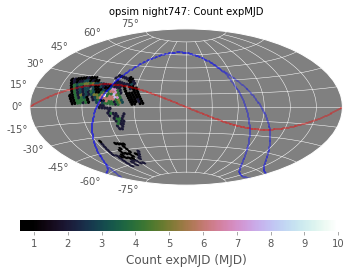

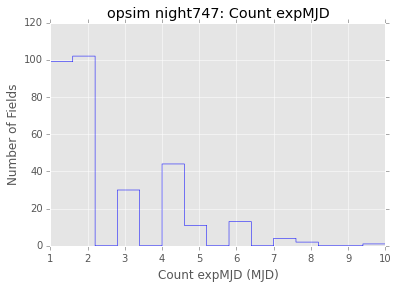

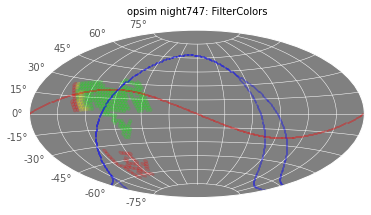

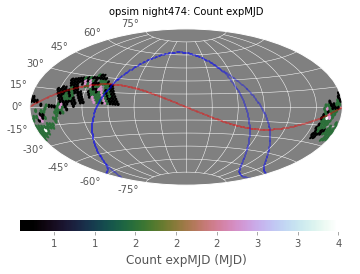

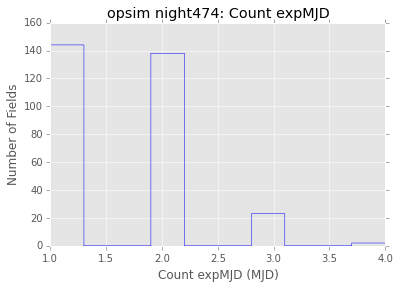

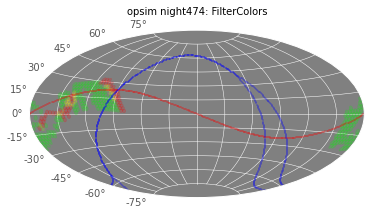

In [6]:
# Look at where the fields that were observed were distributed across the sky.
from lsst.sims.maf.metrics import CountMetric, FilterColorsMetric
from lsst.sims.maf.stackers import FilterColorStacker
from lsst.sims.maf.slicers import OpsimFieldSlicer, HealpixSlicer
from lsst.sims.maf.db import OpsimDatabase
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

plotfunc = [plots.BaseSkyMap()]
nvisits1 = metricBundles.MetricBundle(metric=CountMetric('expMJD'), 
                                      slicer=OpsimFieldSlicer(), sqlconstraint='night=747')
filtervisits1 = metricBundles.MetricBundle(metric=FilterColorsMetric(), 
                                           slicer=OpsimFieldSlicer(), sqlconstraint='night=747',
                                          plotDict={'metricIsColor':True}, plotFuncs=plotfunc)
nvisits2 = metricBundles.MetricBundle(metric=CountMetric('expMJD'), 
                                      slicer=OpsimFieldSlicer(), sqlconstraint='night=474')
filtervisits2 = metricBundles.MetricBundle(metric=FilterColorsMetric(), 
                                           slicer=OpsimFieldSlicer(), sqlconstraint='night=474',
                                           plotDict={'metricIsColor':True}, plotFuncs=plotfunc)

opsdb = OpsimDatabase('../enigma_1189_sqlite.db')

mbg = metricBundles.MetricBundleGroup({'nv1':nvisits1, 'nv2':nvisits2, 'fv1':filtervisits1, 'fv2':filtervisits2}, 
                                          opsdb)
mbg.runAll()
mbg.plotAll(closefigs=False)

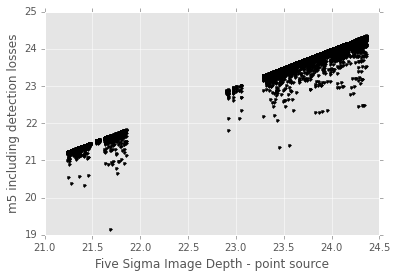

In [7]:
# Just check that our five sigma depth went the correct direction / what were the adjustments due to trailing.
# magFilter = magnitude in filter
# does not include mag losses due to detection - apply these to fiveSigmaDepth
plt.plot(mos.obs['fiveSigmaDepth'], mos.obs['magLimit'], 'k.')
plt.xlabel('Five Sigma Image Depth - point source')
plt.ylabel('m5 including detection losses')

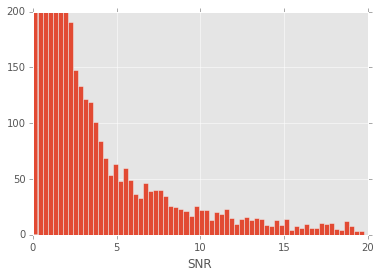

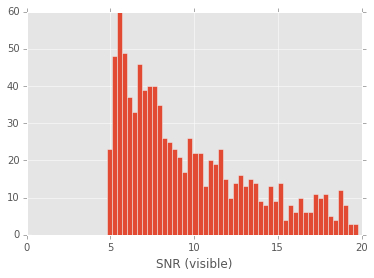

In [8]:
# Histogram the SNR distribution of the observations.
n, b, p = plt.hist(mos.obs['SNR'], bins=np.arange(0, 20, 0.3))
plt.ylim(0, 200)
plt.xlabel("SNR")
# Most objects have very low SNR, which is expected because NEO model has many small objects
vis = np.where(mos.obs['SNR'] >= 5)[0]
plt.figure()
n, b, p = plt.hist(mos.obs['SNR'][vis], bins=np.arange(0, 20, 0.3))
plt.xlabel('SNR (visible)')

(15, 26)

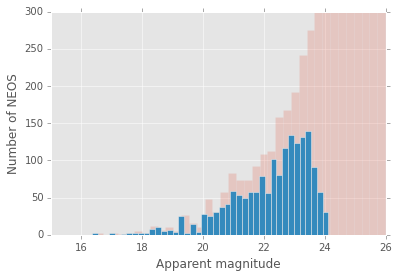

In [9]:
# What did our apparent magnitude distribution look like?
n, b, p = plt.hist(mos.obs['appMag'], bins=100, alpha=0.2)
n, b, p = plt.hist(mos.obs['appMag'][vis], bins=50)
plt.xlabel('Apparent magnitude')
plt.ylabel('Number of NEOS')
plt.ylim(0, 300)
plt.xlim(15, 26)

(0, 1.5)

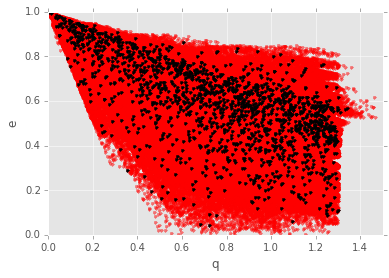

In [10]:
# What did our orbital distribution look like?
plt.plot(mos.orbits['q'], mos.orbits['e'], 'r.', alpha=0.5)
plt.plot(mos.orbits['q'][vis], mos.orbits['e'][vis], 'k.')
plt.xlabel('q')
plt.ylabel('e')
plt.xlim(0, 1.5)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Plotting figures with night=747 sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Plotting figures with night=474 sqlconstraint now.
Plotting complete.


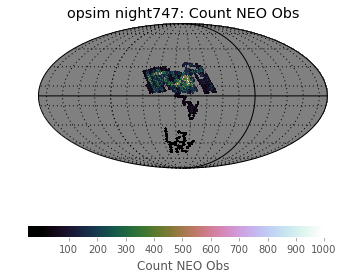

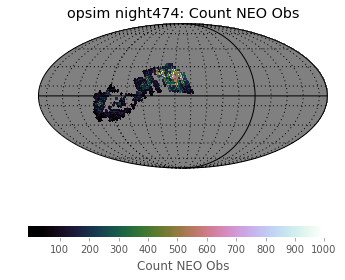

In [11]:
# Let's just look at where the observations of the *objects* (not the fields) were in the sky.
slicer = HealpixSlicer(nside=128)
metric = CountMetric('expMJD', metricName='Count NEO Obs', units='')
simdata = mos.obs.to_records()
sqlconstraint = 'night=747'
mb = metricBundles.MetricBundle(metric, slicer, sqlconstraint=sqlconstraint, 
                                plotFuncs=[plots.HealpixSkyMap()], 
                                plotDict={'rot':(90, 0, 0), 'colorMax':1000})
bg = metricBundles.MetricBundleGroup({'mb':mb}, opsdb)

bg._setCurrent(sqlconstraint)
bg.simData = simdata
bg._runCompatible(['mb'])
bg.plotAll(closefigs=False)


slicer = HealpixSlicer(nside=128)
metric = CountMetric('expMJD', metricName='Count NEO Obs', units='')
simdata = mos2.obs.to_records()
sqlconstraint = 'night=474'
mb = metricBundles.MetricBundle(metric, slicer, sqlconstraint=sqlconstraint, 
                                plotFuncs=[plots.HealpixSkyMap()], 
                                plotDict={'rot':(90, 0, 0), 'colorMax':1000})
bg = metricBundles.MetricBundleGroup({'mb':mb}, opsdb)

bg._setCurrent(sqlconstraint)
bg.simData = simdata
bg._runCompatible(['mb'])
bg.plotAll(closefigs=False)